# EDA

In [2]:
# Importing libraries

import pandas as pd

import seaborn as sns # visualization
import matplotlib.pyplot as plt

In [3]:
# import cleaned dataframe to start EDA

df_bt = pd.read_csv("df_bt.csv")

### Hypotheses for Analysis:
1. Some first names will be found significantly more often.
   1a) In the parties CDU/CSU, FDP and AfD there will be a higher concentration and more male first names.
   1b) In the parties Die Grünen, Gruppe Die Linke/Gruppe BSW and SPD there will be a lower concentration and more female names.
2. The distribution of party belonging will be like the end results of the 2021 election of parliament.
3. Ersteinzug: due to data deficiency (more than 50% NaNs), it was decided not to test any hypothesis on this column
4. Academical grade: the occurance of the academical grade "Dr." in the German Bundestag is higher than in the represented population (2019: 1.2%)

In [5]:
df_bt.info

<bound method DataFrame.info of        Nachname    Vorname  Ersteinzug      Partei Akadem. Grad
0          Abdi      Sanae         NaN         SPD          NaN
1          Abel   Valentin         NaN         FDP          NaN
2       Abraham       Knut         NaN     CDU/CSU          NaN
3         Adler      Katja         NaN         FDP          NaN
4       Aeffner  Stephanie      2022.0  Die Grünen          NaN
..          ...        ...         ...         ...          ...
763      Zierke     Stefan      2013.0         SPD          NaN
764  Zimmermann       Jens         NaN         SPD          Dr.
765   Zippelius    Nicolas      2021.0     CDU/CSU          NaN
766        Zorn     Armand         NaN         SPD          NaN
767      Zschau     Katrin      2022.0         SPD          NaN

[768 rows x 5 columns]>

In [6]:
df_bt.sample(10)

,Nachname,Vorname,Ersteinzug,Partei,Akadem. Grad
534,Ramsauer,Peter,NaN,CDU/CSU,Dr.
88,Bühl,Marcus,NaN,AfD,NaN
114,Diedenhofen,Martin,2022.0,SPD,NaN
194,Gremmels,Timon,2017.0,SPD,NaN
174,Gava,Manuel,2022.0,SPD,NaN
688,Tippelt,Nico,2021.0,FDP,NaN
686,Tillmann,Antje,2002.0,CDU/CSU,NaN
555,Rohde,Dennis,NaN,SPD,NaN
606,Schneider,Daniel,2022.0,SPD,NaN
634,Semet,Rainer,2022.0,FDP,NaN


### Hypothesis 1: Some first names will be found significantly more often.

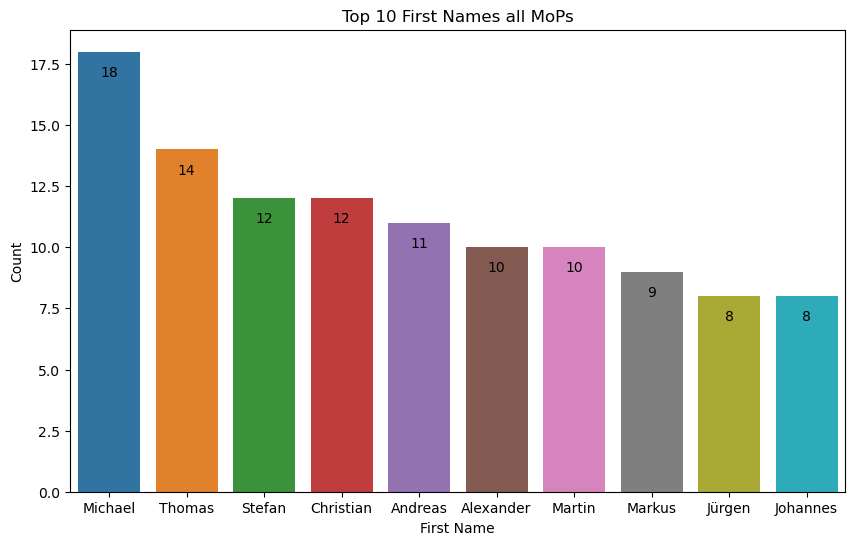

In [132]:
# filtering the top 10 first names:
vorname_ten = df_bt['Vorname'].value_counts().nlargest(10).reset_index()
vorname_ten.columns = ['name', 'count']

# creating a barplot for these
plt.figure(figsize=(10, 6))
sns.barplot(data=vorname_ten, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_ten['count']):
    plt.text(index, value - 1, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 10 First Names all MoPs')
plt.show()

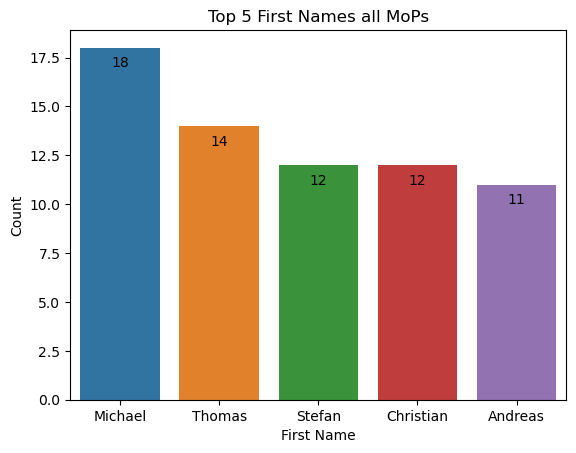

In [130]:
# filtering the top 5 first names:
vorname_five = df_bt['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five.columns = ['name', 'count']

# creating a barplot for these
sns.barplot(data=vorname_five, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five['count']):
    plt.text(index, value - 1, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names all MoPs')
plt.show()

In [124]:
vorname_five.set_index("name")

,count
name,
Michael,18
Thomas,14
Stefan,12
Christian,12
Andreas,11


### Hypothesis 1a) In the parties CDU/CSU, FDP and AfD there will be a higher concentration and more male first names.

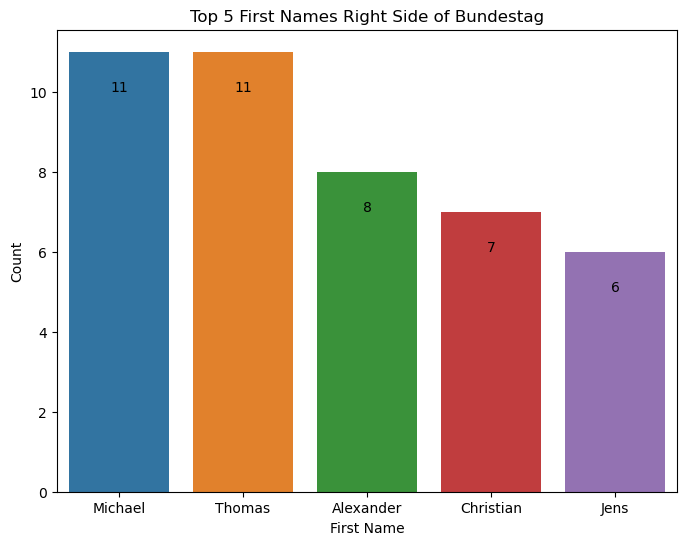

In [50]:
# filtering df for those three fractions
df_bt_rechts = df_bt[(df_bt["Partei"] == "CDU/CSU") | (df_bt["Partei"] == "FDP") | (df_bt["Partei"] == "AfD") ]

# filtering the top 5 first names:
vorname_five_rechts = df_bt_rechts['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five_rechts.columns = ['name', 'count']

# creating a barplot for these
plt.figure(figsize=(8, 6))
sns.barplot(data=vorname_five_rechts, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five_rechts['count']):
    plt.text(index, value - 1, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names Right Side of Bundestag')
plt.show()

In [104]:
# checking baseline: this df counts for almost exactely half of the dataset
df_bt_rechts

,Nachname,Vorname,Ersteinzug,Partei,Akadem. Grad
1,Abel,Valentin,NaN,FDP,NaN
2,Abraham,Knut,NaN,CDU/CSU,NaN
3,Adler,Katja,NaN,FDP,NaN
8,Al-Halak,Muhanad,NaN,FDP,NaN
10,Albani,Stephan,NaN,CDU/CSU,NaN
...,...,...,...,...,...
758,Wundrak,Joachim,2021.0,AfD,NaN
760,Zeulner,Emmi,NaN,CDU/CSU,NaN
761,Ziegler,Kay-Uwe,2021.0,AfD,NaN
762,Ziemiak,Paul,NaN,CDU/CSU,NaN


#### Testing hypothesis:
In regards to the hypothesis, this means the first part of it can be confirmed:
- There is a higher concentration of first names among the partie sof the right side of the political spectrum
- Also, there is exclusively male names in the top five first names

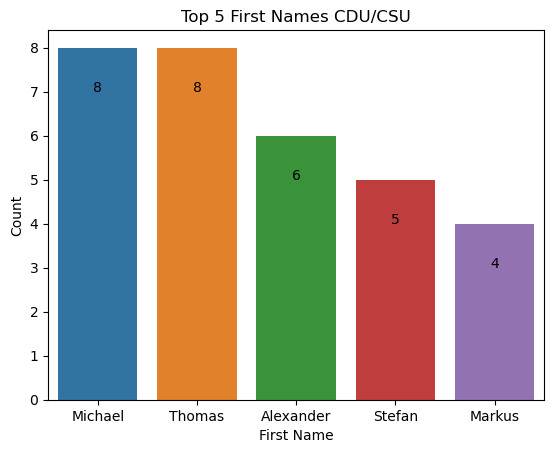

In [76]:
# filtering df for only one party
df_bt_cdu_csu = df_bt[df_bt["Partei"] == "CDU/CSU"]

# filtering the top 5 first names:
vorname_five_1 = df_bt_cdu_csu['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five_1.columns = ['name', 'count']

# creating a barplot for these
sns.barplot(data=vorname_five_1, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five_1['count']):
    plt.text(index, value - 1, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names CDU/CSU')
plt.show()

In [122]:
vorname_five_1.set_index("name")

,count
name,
Michael,8
Thomas,8
Alexander,6
Stefan,5
Markus,4


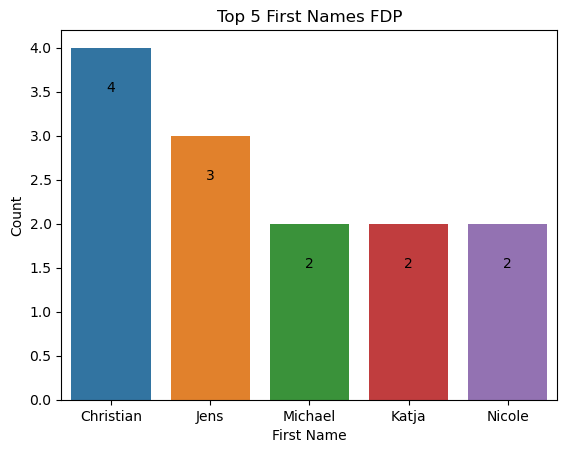

In [86]:
# filtering df for only one party
df_bt_fdp = df_bt[df_bt["Partei"] == "FDP"]

# filtering the top 5 first names:
vorname_five_2 = df_bt_fdp['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five_2.columns = ['name', 'count']

# creating a barplot for these
sns.barplot(data=vorname_five_2, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five_2['count']):
    plt.text(index, value -0.5, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names FDP')
plt.show()

In [120]:
vorname_five_2.set_index("name")

,count
name,
Christian,4
Jens,3
Michael,2
Katja,2
Nicole,2


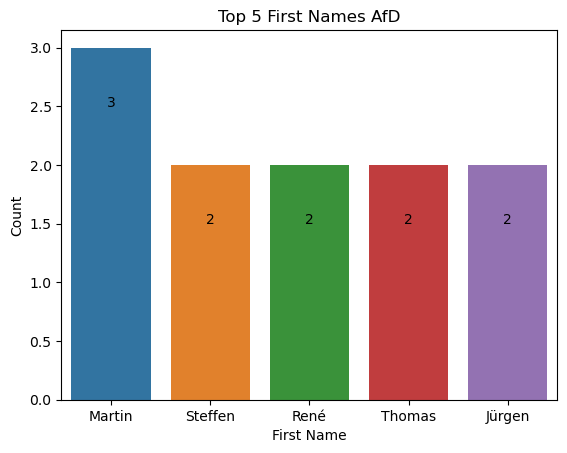

In [90]:
# filtering df for only one party
df_bt_afd = df_bt[df_bt["Partei"] == "AfD"]

# filtering the top 5 first names:
vorname_five_3 = df_bt_afd['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five_3.columns = ['name', 'count']

# creating a barplot for these
sns.barplot(data=vorname_five_3, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five_3['count']):
    plt.text(index, value - 0.5, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names AfD')
plt.show()

In [118]:
vorname_five_3.set_index("name")

,count
name,
Martin,3
Steffen,2
René,2
Thomas,2
Jürgen,2


### Hypothesis 1b) In the parties Die Grünen, Gruppe Die Linke/Gruppe BSW and SPD there will be a lower concentration and more female names.

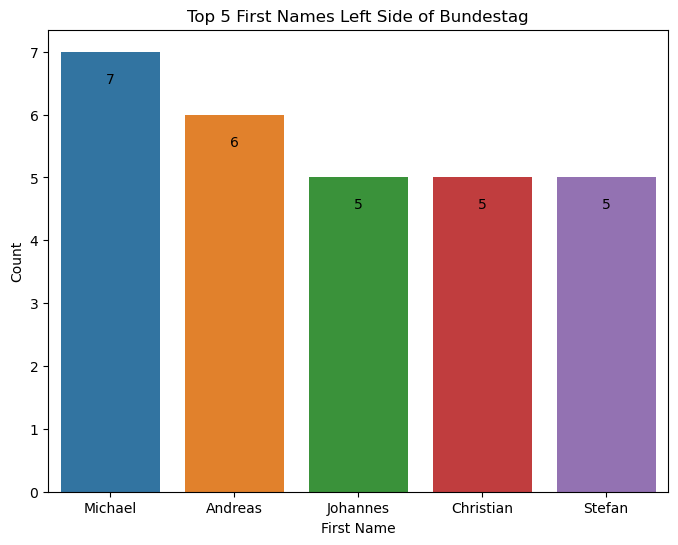

In [72]:
# filtering df for those three fractions
df_bt_links = df_bt[(df_bt["Partei"] == "SPD") | (df_bt["Partei"] == "Die Grünen") | (df_bt["Partei"] == "Gruppe Die Linke") | (df_bt["Partei"] == "Gruppe BSW") ]

# filtering the top 5 first names:
vorname_five_links = df_bt_links['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five_links.columns = ['name', 'count']

# creating a barplot for these
plt.figure(figsize=(8, 6))
sns.barplot(data=vorname_five_links, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five_links['count']):
    plt.text(index, value - 0.5, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names Left Side of Bundestag')
plt.show()

In [106]:
# checking baseline: this df counts for almost exactely the other half of the dataset
df_bt_links

,Nachname,Vorname,Ersteinzug,Partei,Akadem. Grad
0,Abdi,Sanae,NaN,SPD,NaN
4,Aeffner,Stephanie,2022.0,Die Grünen,NaN
5,Ahmetović,Adis,NaN,SPD,NaN
6,Akbulut,Gökay,2017.0,Gruppe Die Linke,NaN
7,Al-Dailami,Ali,2021.0,Gruppe BSW,NaN
...,...,...,...,...,...
759,Yüksel,Gülistan,NaN,SPD,NaN
763,Zierke,Stefan,2013.0,SPD,NaN
764,Zimmermann,Jens,NaN,SPD,Dr.
766,Zorn,Armand,NaN,SPD,NaN


#### Testing hypothesis:
In regards to the hypothesis, this means only the first part of it can be confirmed:
- There is a lower concentration of first names among the partie of the left side of the political spectrum
- The second part cannot be confirmed because there is also exclusively male names in the top five first names

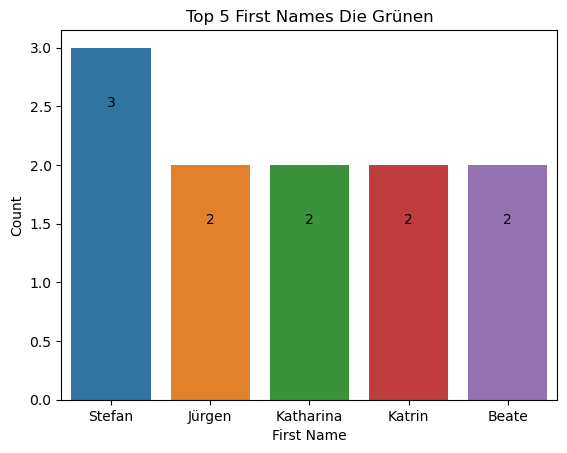

In [92]:
# filtering df for only one party
df_bt_grün = df_bt[df_bt["Partei"] == "Die Grünen"]

# filtering the top 5 first names:
vorname_five_4 = df_bt_grün['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five_4.columns = ['name', 'count']

# creating a barplot for these
sns.barplot(data=vorname_five_4, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five_4['count']):
    plt.text(index, value - 0.5, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names Die Grünen')
plt.show()

In [116]:
vorname_five_4.set_index("name")

,count
name,
Stefan,3
Jürgen,2
Katharina,2
Katrin,2
Beate,2


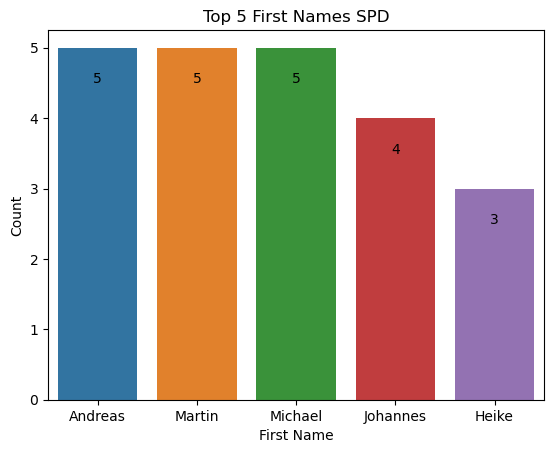

In [112]:
# filtering df for only one party
df_bt_spd = df_bt[df_bt["Partei"] == "SPD"]

# filtering the top 5 first names:
vorname_five_5 = df_bt_spd['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five_5.columns = ['name', 'count']

# creating a barplot for these
sns.barplot(data=vorname_five_5, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five_5['count']):
    plt.text(index, value - 0.5, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names SPD')
plt.show()

In [110]:
vorname_five_5.set_index("name")

,count
name,
Andreas,5
Martin,5
Michael,5
Johannes,4
Heike,3


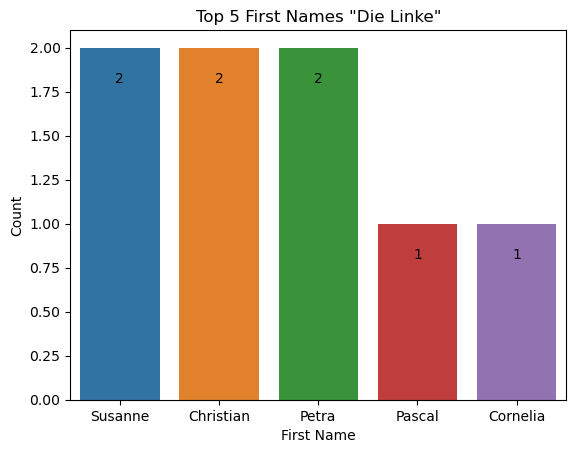

In [100]:
# filtering df for only one party
df_bt_linke = df_bt[(df_bt["Partei"] == "Gruppe Die Linke") | (df_bt["Partei"] == "Gruppe BSW")]

# filtering the top 5 first names:
vorname_five_6 = df_bt_linke['Vorname'].value_counts().nlargest(5).reset_index()
vorname_five_6.columns = ['name', 'count']

# creating a barplot for these
sns.barplot(data=vorname_five_6, x='name', y='count')

# showing the absolute number on the bar 
for index, value in enumerate(vorname_five_6['count']):
    plt.text(index, value - 0.2, str(value), ha='center')

plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 5 First Names "Die Linke"')
plt.show()

In [108]:
vorname_five_6.set_index("name")

,count
name,
Susanne,2
Christian,2
Petra,2
Pascal,1
Cornelia,1


### Hypothesis 2. The distribution of party belonging will be like the end results of the 2021 election of parliament.

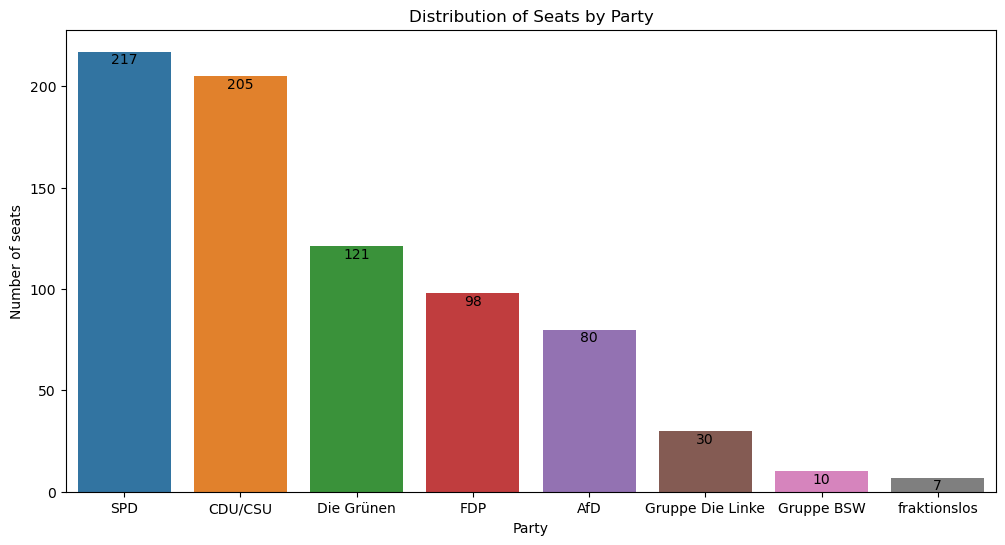

In [138]:
# counting values from party
df_bt_partei = df_bt['Partei'].value_counts()

# create barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_bt_partei.index, y=df_bt_partei.values)

# showing values in the diagramm
for index, value in enumerate(df_bt_partei.values):
    plt.text(index, value -6, str(value), ha='center')

plt.xlabel('Party')
plt.ylabel('Number of seats')
plt.title('Distribution of Seats by Party')

# Diagramm anzeigen
plt.show()

# This is not right
there must have been some mistake either I made one when gathering or cleaning the data or the data retrieved from API and Webscraping had some limitations


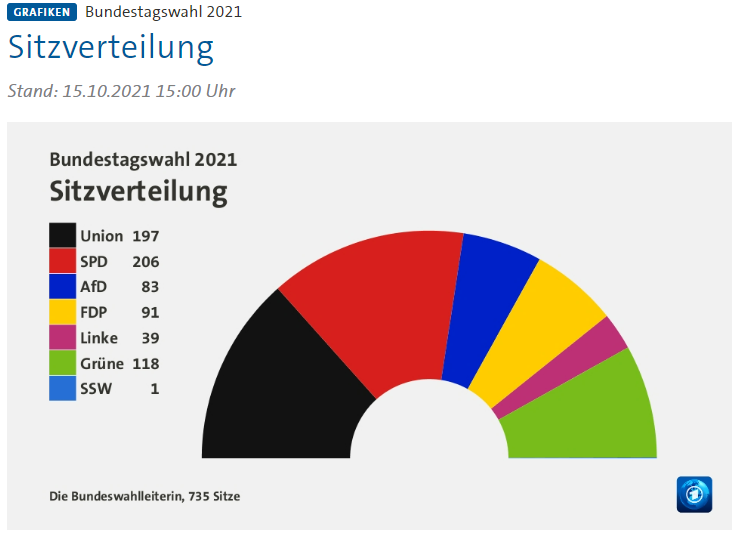

### Hypothesis 3. Ersteinzug: see above, no hypothesis on this column

C:\Users\paula\AppData\Local\Temp\ipykernel_26576\389437267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ersteinzug["Ersteinzug"] = df_ersteinzug["Ersteinzug"].astype(int)


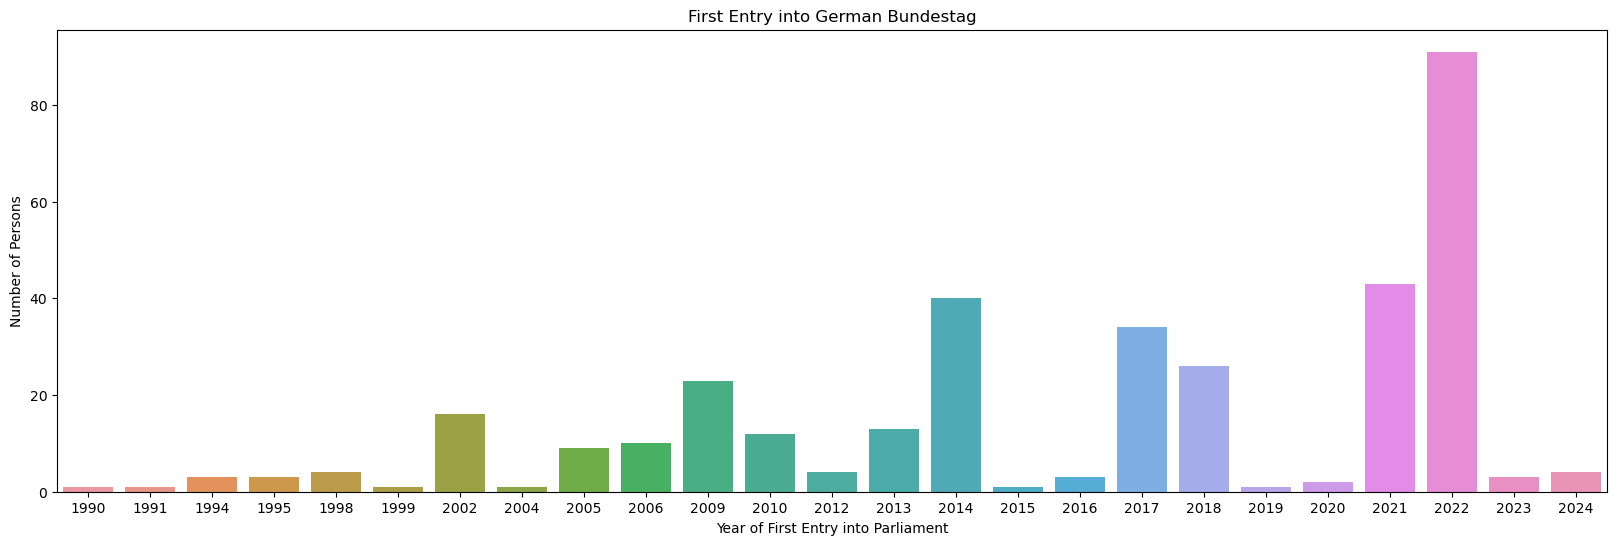

In [28]:
df_ersteinzug = df_bt.dropna(subset=["Ersteinzug"])

# convert column to int
df_ersteinzug["Ersteinzug"] = df_ersteinzug["Ersteinzug"].astype(int)

ersteinzug_counts = df_ersteinzug['Ersteinzug'].value_counts().sort_index()

# creating barplot
plt.figure(figsize=(20, 6))
sns.barplot(x=ersteinzug_counts.index, y=ersteinzug_counts.values)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Year of First Entry into Parliament')
plt.ylabel('Number of Persons')
plt.title('First Entry into German Bundestag')

# Diagramm anzeigen
plt.show()

### Hypothesis 4. Academical grade: the occurance of the academical grade "Dr." in the German Bundestag is higher than in the represented population
(2019: 1.2%, source: https://www.academics.de/ratgeber/promotion-statistik)

In [30]:
df_bt["Akadem. Grad"].unique()

array([nan, 'Dr.', 'Prof.'], dtype=object)

In [31]:
df_bt["Akadem. Grad"].value_counts()

Akadem. Grad
Dr.      122
Prof.      9
Name: count, dtype: int64

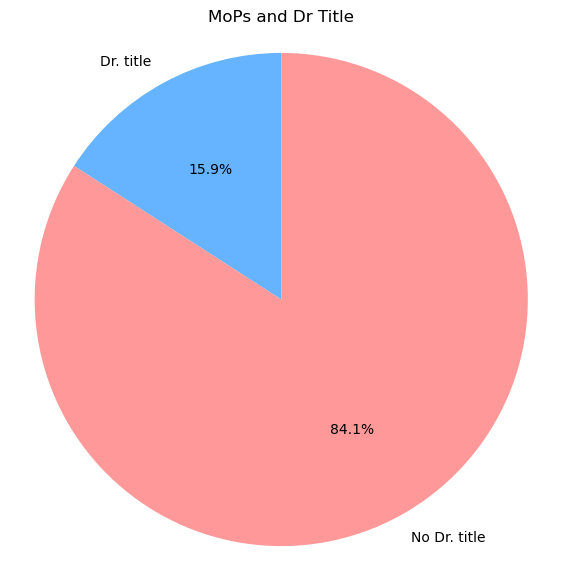

In [33]:
# only rows with "Dr"
grad_dr = df_bt[df_bt["Akadem. Grad"] == "Dr."].shape[0]

# all rows in df
total_count = df_bt.shape[0]

# rows with NO dr title
kein_dr = total_count - grad_dr

# creating pie chart
values = [grad_dr, kein_dr]
labels = ["Dr. title", "No Dr. title"]

plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.axis('equal')
plt.title("MoPs and Dr Title")
plt.show()

### Comments on EDA
- The created df is faulty, for reasons I cannot figure out, there are more MoPs in this df than there should be (around 30) and therefore the calculations based on numbers are not right either. In their tendency, they are not wrong but in absolute terms, they are.
- Also includes members of parliament who were elected in 2021 but do not have a mandate anymore
- One member who left parliament before the splitting of the party "Die Linke" was assigned to "Gruppe Die Linke" (Kipping, Katja)